In [1]:
import seaborn as sns
import pandas as pd
import plotly as plt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
%matplotlib inline

In [2]:
# These functions will be reused throughts this exploration

def generate_sns_box_plot(
    df, x_column_name, y_column_name,
    title="", x_axis_label=None, y_axis_label=None,
    min_y =None, max_y= None, x_dim = 45, y_dim = 7):
    

    max_y, min_y = _get_min_max_y(df, y_column_name, max_y, min_y)

    a4_dims = (x_dim, y_dim)
    fig, ax = plt.subplots(figsize=a4_dims)

    if y_axis_label is not None:
        plt.ylabel(y_axis_label)

    if x_axis_label is not None:
        plt.xlabel(x_axis_label)


    ax.set(ylim=(min_y, max_y))
    ax = sns.boxplot(x=x_column_name, y=y_column_name, data=df)
    #ax = sns.swarmplot(x=x_column_name, y=y_column_name, data=df, color=".05",size=2 )


    return ax



def _get_min_max_y(df, y_col_name, max_y, min_y, stddev_multiplier=1 / 3):

    if (max_y == None):
        max_y = df[y_col_name].max() + df[y_col_name].std() * stddev_multiplier

    if (min_y == None):
        min_y = df[y_col_name].min() - df[y_col_name].std() * stddev_multiplier

    return max_y, min_y


def filter_dataframe_by_values_of_interest(df,x_var,var_list):
    df_list = []
    for var in var_list:
        new_df = df[df[x_var]==var]
        if(len(new_df)>0):
            df_list.append(new_df)
        else:
            print("Didn't find values matching: " + var)
    df_ret = pd.concat(df_list,ignore_index=True)
    
    return df_ret

def plot_variables_of_interest(df,x_var,y_values,var_list, x_dim = 10, y_dim = 10):
    
    df_ret = filter_dataframe_by_values_of_interest(df,x_var,var_list,)
    
    generate_sns_box_plot(df_ret,x_var, y_values, x_dim = x_dim, y_dim = y_dim)

### Business Questions

All questions asked will be asked for respondents from the United States :
1. How much does you level of education contribute to your salary?
2. How much does your undergrad major contribute to your salary?
3. How much does race and gender contribute to salary?
4. What factors in general contribute to salary the most?


4. How does pay differ by company size?
5. How does your education relate with job satisfaction / career satisfaction? 
6. What percentage of people get a doctoral degree by country. 

## Step 1: Gather Data

In [3]:
df_blog = pd.read_csv("data_input/survey_results_public.csv")

## Step 2: Assess Data

In [4]:
# As one of our critical variables is Salary, let's check for the number of nulls it has:
print("Percent of Salary Nulls: " + str(np.sum(df_blog["Salary"].isnull())/len(df_blog) * 100))
# Every response has a value for country, which means we don't have to handle nulls for this
print("Percent of Country Nulls: " + str(np.sum(df_blog["Country"].isnull())/len(df_blog) * 100))

# The following will be treated individually as we progress through our analysis 
print("Percent of Formal Education Nulls: " + str(np.sum(df_blog["FormalEducation"].isnull())/len(df_blog) * 100))
print("Percent of MajorUndergrad Nulls: " + str(np.sum(df_blog["MajorUndergrad"].isnull())/len(df_blog) * 100))
print("Percent of Gender Nulls: " + str(np.sum(df_blog["Gender"].isnull())/len(df_blog) * 100))
print("Percent of Race Nulls: " + str(np.sum(df_blog["Race"].isnull())/len(df_blog) * 100))


Percent of Salary Nulls: 74.91632938978829
Percent of Country Nulls: 0.0
Percent of Formal Education Nulls: 0.0
Percent of MajorUndergrad Nulls: 16.638776463262765
Percent of Gender Nulls: 31.804561021170606
Percent of Race Nulls: 35.72345890410959


## Step 3: Clean Data

In [5]:
# We only care about responses that have a non null salary, so let's filter for that
df_blog = df_blog[~ df_blog["Salary"].isnull()]
print("Updated Percent of Salary Nulls: " + str(np.sum(df_blog["Salary"].isnull())/len(df_blog) * 100))

Updated Percent of Salary Nulls: 0.0


## Step 4: Analyze
### Q1:  How much does you level of education correlate with salary satisfaction?

In [6]:
df_us = df_blog[df_blog["Country"] == "United States"]
# Filter out all null values for education
df_us_edu = df_us[~ df_us["Salary"].isnull()]
# Get percentages by education level
df_us_edu["FormalEducation"].value_counts() / len(df_us_edu["FormalEducation"]) * 100

Bachelor's degree                                                    60.142819
Some college/university study without earning a bachelor's degree    17.561492
Master's degree                                                      16.530019
Secondary school                                                      2.327427
Doctoral degree                                                       2.327427
Primary/elementary school                                             0.476065
Professional degree                                                   0.290928
I never completed any formal education                                0.211584
I prefer not to answer                                                0.132240
Name: FormalEducation, dtype: float64

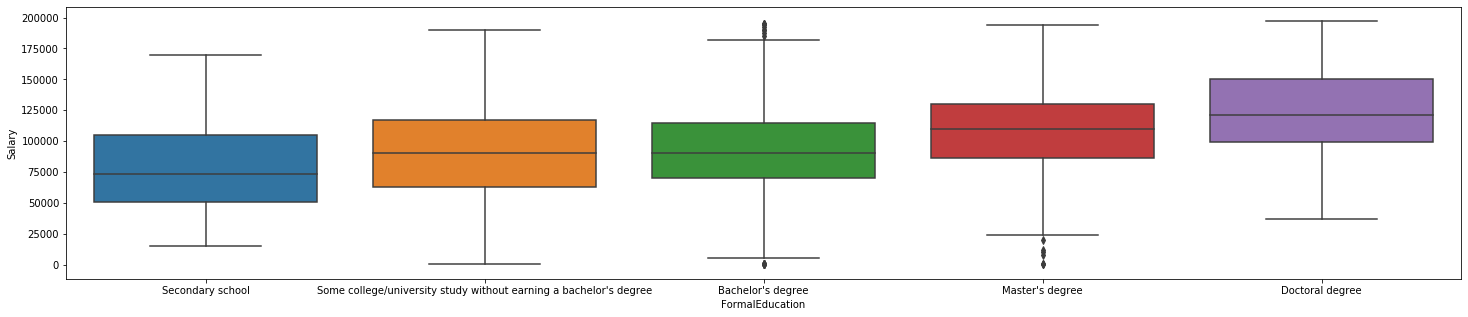

In [10]:
# We only care about the following variables
education_list= ["Secondary school","Some college/university study without earning a bachelor's degree",
                 "Bachelor's degree","Master's degree","Doctoral degree"]

# We can see a clear trend with salary and level of education
plot_variables_of_interest(df_us_edu,"FormalEducation","Salary",education_list,x_dim = 25,y_dim=5)

### Q2: How much does your undergrad major correlate to your salary?

In [8]:
# remove null values for undergrad major
df_us_major = df_us[~ df_us["MajorUndergrad"].isnull()] 
# Get an understanding of what responders studies in undergrad
df_us_major["MajorUndergrad"].value_counts() / len(df_us_major["MajorUndergrad"]) * 100

Computer science or software engineering                        50.559956
Computer engineering or electrical/electronics engineering       8.549577
A natural science                                                4.944004
Computer programming or Web development                          4.862060
A non-computer-focused engineering discipline                    3.878722
Mathematics or statistics                                        3.769462
A humanities discipline                                          3.605572
Fine arts or performing arts                                     3.168533
Information technology, networking, or system administration     3.086588
Something else                                                   3.031958
A business discipline                                            2.895384
Management information systems                                   2.540290
A social science                                                 2.294455
I never declared a major              

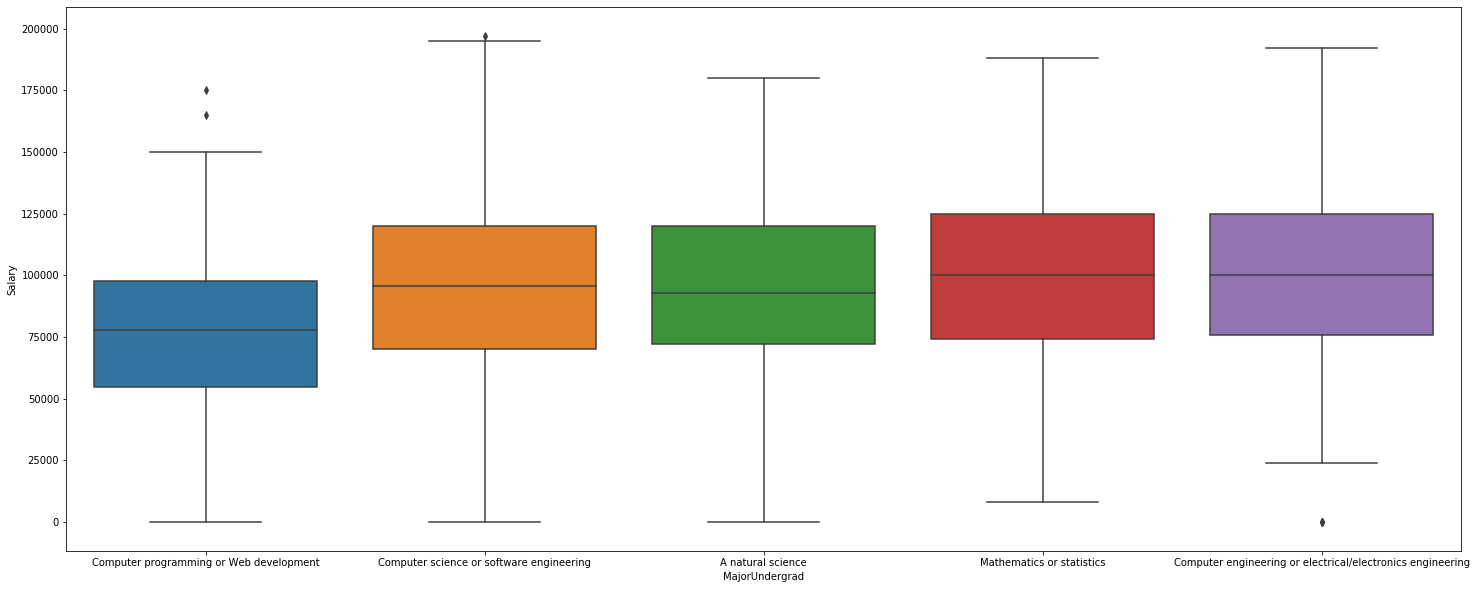

In [9]:
# This is the list we care about 
undergrad_major_list= ["Computer programming or Web development","Computer science or software engineering",
 "A natural science","Mathematics or statistics","Computer engineering or electrical/electronics engineering",]


plot_variables_of_interest(df_us_major,"MajorUndergrad","Salary",undergrad_major_list,x_dim = 25)

### Q3: How much does race and gender correlate with salary?

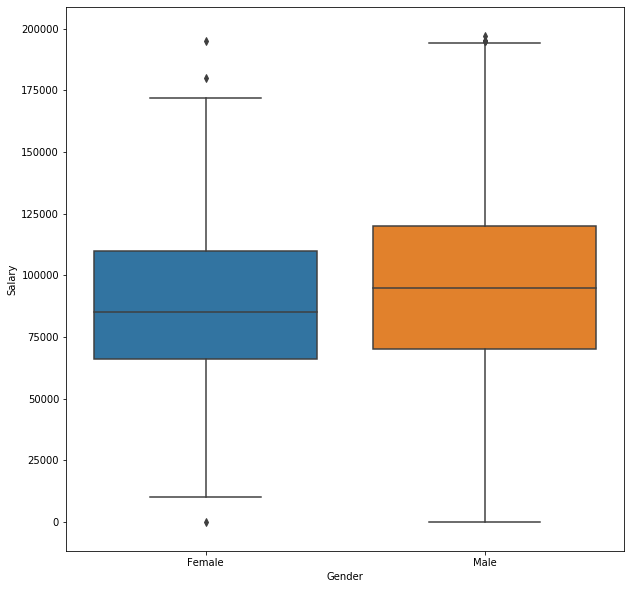

In [10]:
# remove null values for undergrad major
df_us_gender = df_us[~ df_us["Gender"].isnull()] 
gender_list= ["Female","Male",]
plot_variables_of_interest(df_us_gender,"Gender","Salary",gender_list)

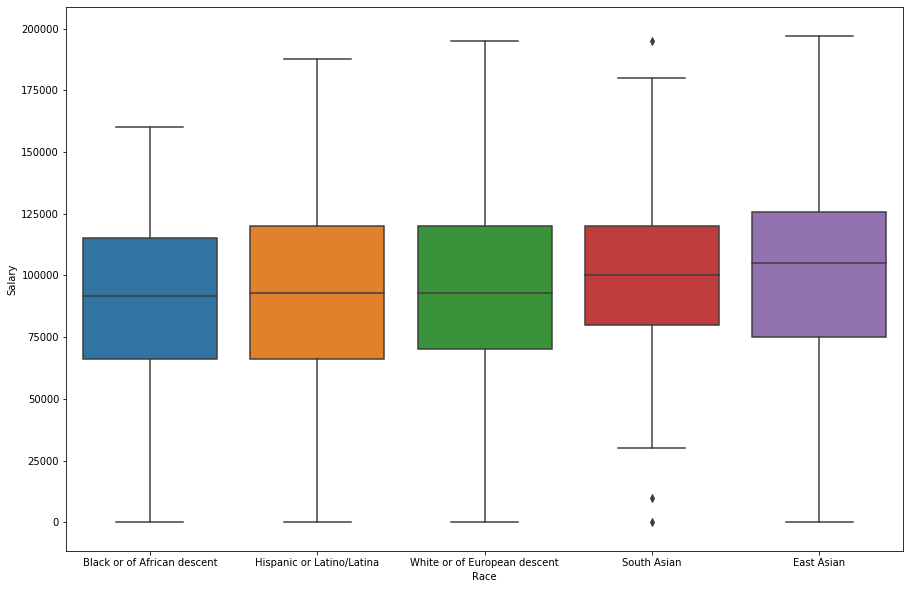

In [11]:
df_us_race = df_us[~ df_us["Race"].isnull()] 
r_list = ["Black or of African descent",'Hispanic or Latino/Latina', 
          "White or of European descent","South Asian", "East Asian"]
plot_variables_of_interest(df_us_race,"Race","Salary",r_list,x_dim=15)          

### Q4: How much do the caterogies described above contribute to salary?

In [12]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. For each numeric variable in X, fill the column with the mean value of the column.
    5. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']

    df = df.drop(['Salary'], axis=1)
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], 
         prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y




In [13]:
df_us_salary_custom = df_us[['Salary','Race','Gender','MajorUndergrad','FormalEducation','YearsCodedJob','CompanyType']]
df_us_salary_custom = filter_dataframe_by_values_of_interest(df_us_salary_custom,'Race',r_list)
df_us_salary_custom = filter_dataframe_by_values_of_interest(df_us_salary_custom,'Gender',gender_list)
df_us_salary_custom = filter_dataframe_by_values_of_interest(df_us_salary_custom,'FormalEducation',education_list)
df_us_salary_custom = filter_dataframe_by_values_of_interest(df_us_salary_custom,'MajorUndergrad',undergrad_major_list)


In [14]:
X, y = clean_data(df_us_salary_custom)

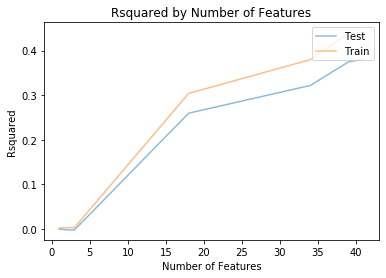

In [15]:
cutoffs = [1944,1900,1800,1600,1400,1200,1100,1000,100,50,25,5, 4,3, 2, 1]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [16]:

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)

    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    #coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('coefs', ascending=False)
    return coefs_df



In [17]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(60)

,est_int,coefs
23,YearsCodedJob_20 or more years,53064.638609
19,YearsCodedJob_17 to 18 years,50626.325660
21,YearsCodedJob_19 to 20 years,49081.544962
16,YearsCodedJob_14 to 15 years,44779.675677
12,YearsCodedJob_10 to 11 years,41842.934138
14,YearsCodedJob_12 to 13 years,39985.807276
13,YearsCodedJob_11 to 12 years,39609.121013
18,YearsCodedJob_16 to 17 years,39195.012798
17,YearsCodedJob_15 to 16 years,36731.941293
15,YearsCodedJob_13 to 14 years,35562.749868


In [18]:
# Percentage of country choosing to do a PHD:

for country in df_blog["Country"].unique():
    
    df_country = df_blog[df_blog["Country"]==country]
    doc_num = df_country[df_country["FormalEducation"] == "Doctoral degree"].shape[0]
    total_num = df_country.shape[0]
    print(country + ": " + str(doc_num/ total_num*100))
    



United Kingdom: 4.040404040404041
United States: 2.3274266067177996
Israel: 0.0
Croatia: 4.3478260869565215
Argentina: 0.0
Germany: 3.2193158953722336
Brazil: 0.8438818565400843
Italy: 1.9900497512437811
India: 0.24360535931790497
Netherlands: 4.62962962962963
Poland: 0.9463722397476341
Spain: 1.4388489208633095
France: 6.289308176100629
Turkey: 2.898550724637681
Mexico: 1.0416666666666665
Estonia: 0.0
Finland: 6.024096385542169
Denmark: 4.444444444444445
Lithuania: 0.0
Sweden: 3.076923076923077
Ukraine: 2.7777777777777777
Russian Federation: 1.5151515151515151
Canada: 1.4992503748125936
Uruguay: 0.0
Greece: 1.6666666666666667
Costa Rica: 0.0
Iran: 0.0
Slovenia: 0.0
El Salvador: 0.0
Portugal: 0.0
Switzerland: 4.666666666666667
Albania: 0.0
Austria: 0.0
Romania: 0.8264462809917356
Australia: 1.5625
Japan: 0.0
Belgium: 1.0526315789473684
Vietnam: 0.0
Norway: 0.0
Saudi Arabia: 0.0
Colombia: 0.0
Bulgaria: 0.0
Pakistan: 0.0
Serbia: 0.0
Czech Republic: 2.5974025974025974
Macedonia: 0.0
New Z